In [1]:
#import pandas as pd
import numpy as np
#from pandas import ExcelWriter
#from pandas import ExcelFile
#from scipy import stats
import matplotlib.pyplot as plt
#import math
#import xlwt
#import openpyxl

In [2]:
#finds line position of lookup in filename and returns it to be used in GCgraph function

def findPosition (filename, lookup):
    dataFile = open(filename, "r")
    position = 0
    dataAsNumberedList = enumerate(dataFile, 1)
    for num, line in dataAsNumberedList:
        if lookup in line: # lookup is defined in GCgraph function
            position = num
            
    dataFile.close()
    
    return position


In [15]:
#parses through txt file. Finds chromatogram data and returns a plot

def GCgraph (filename):
    lookup = '[Chromatogram (Ch1)]'
    start = findPosition(filename, '[Chromatogram (Ch1)]') #calls findPosition function and allows any filename as input
    end = findPosition(filename, '[Chromatogram Additional (Ch1)]')
    rawData = open(filename).readlines() #converts txt file lines into a list

    chromData = []
    RTime = []
    Intensity = []
    
    #iterates through every line in txt file

    for i in range(len(rawData)): # loops through every line in txt file
        if i >= start + 5 and i <= end - 3: # start and end come from findPosition function, they are just numbers
            clean = rawData[i].strip().split('\t')
            RTime.append(clean[0])
            Intensity.append(clean[1])
            #RTime.append(float(clean[0]))      # Absolutely essential that the data is stored as floats, otherwise they are stored as strings, which slows down matplotlib
            #Intensity.append(float(clean[1]))
            
    RTime = [float(t) for t in RTime]            # This is another way to convert RTime from string to floats. Saved this code as an example
    Intensity = [float(i) for i in Intensity]
    
    %matplotlib inline
    graph = plt.plot(RTime, Intensity)
    plt.xlim(0,26)
    plt.ylim(-1000,100000)
    plt.suptitle("GC Data: " + filename)
    plt.xlabel("min")
    plt.ylabel("intensity")
    
    return graph

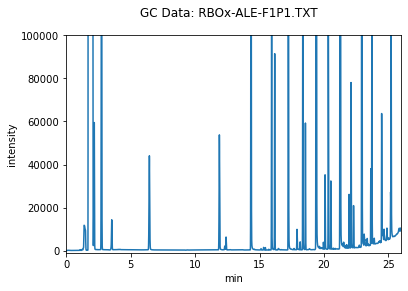

In [16]:
GCgraph('RBOx-ALE-F1P1.TXT')

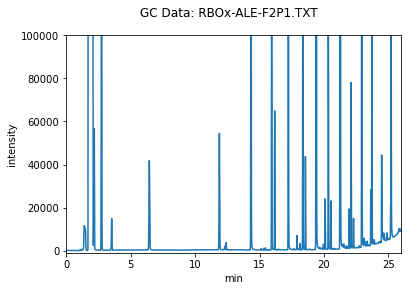

In [17]:
GCgraph('RBOx-ALE-F2P1.TXT')

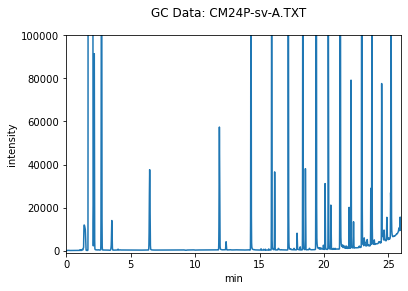

In [18]:
GCgraph('CM24P-sv-A.TXT')

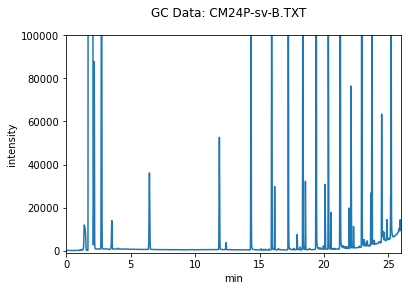

In [22]:
GCgraph('CM24P-sv-B.TXT')